In [1]:
import quantstats as qs
import yfinance as yf
import ccxt as ccxt
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.ticker import (
    FormatStrFormatter as _FormatStrFormatter,
    FuncFormatter as _FuncFormatter
)
from datetime import date

#my imports
import sys
sys.path.insert(1, '../scripts')
import utils as utl
import html_evaluation_portfolio as hep
import volatility_estimator as ve

# Comparing portfolios' return computed through different volatility estimator 

In [2]:
list_securities = ['SSO'] #['TMF', 'TYD', 'UPRO'] #['SSO', 'UBT', 'UGL'] #['VTI', 'VGLT',  'IAU'] # #['SPY', 'TLT', 'GLD'] 
window = 30
#start_date = pd.to_datetime('2007-01-03') 
#end_date = pd.to_datetime(start_date) + pd.DateOffset(days=1814)
end_date = date.today()
start_date = pd.to_datetime(end_date) - pd.DateOffset(days=1824) 

title = 'Comparasion of SSO'
save_name = 'SSO_comparasion'

In [42]:
dictionary = {}
data = hep.create_dataframe(list_securities) #I can import this dataframe but it is preatty fast.
sso_df = pd.DataFrame()

for i in list_securities:
    #df_strd_dev: dataframe with the volatility estimation
    df_strd_dev = ve.dataframe_strd_dev(data, window)
    
    #re index
    df_strd_dev = ve.index_df(df_strd_dev, data, window)
    data_return = hep.return_df(data)
    
    sso_df['stdv'] = df_strd_dev[30:]
    
    #compute the inverse of the volatility for each cells
    inv_volat_data = hep.df_inverse_volatility(data_return, window)
    
    #normalize the data frame
    df_weighted = hep.df_wheighted(inv_volat_data)
    
    #multiply by the returns
    data_earnings = hep.df_earnings(df_weighted, data_return)
    data_earnings.dropna(inplace = True)
    
    data_earnings = data_earnings[start_date: end_date]
    
    dictionary['stdv'] = data_earnings[30:]
    
for i in list_securities:
    data_h_l = ve.create_dataframe_high_low(list_securities)   
    #data_h_l = data_h_l[1135: 1135 + 1834]
    data_h_l = data_h_l.loc[start_date: end_date]
    
    #df_volat: dataframe with the volatility estimation
    df_volat = ve.compute_park_volatility(data_h_l, list_securities, window)
    data.dropna(inplace = True)
    #data = data[1135: 1135 + 1834]
    data = data[start_date: end_date]
    
    #re index
    if end_date == date.today():
        df_volat = ve.index_df(df_volat, data, window)
    else:
        df_volat = ve.index_df(df_volat, data, window)
    
    sso_df['parkinson'] = df_volat
        
    #compute the inverse of the volatility for each cells
    df_inv_volat = df_volat.applymap(lambda x: 1/x)
    
    #normalize every row of the dataframe
    df_weighted = hep.df_wheighted(df_inv_volat)
    data_r = data.div(data.shift(1))-1
    
    #multipy for th ereturns
    data_earnings = hep.df_earnings(df_weighted, data_r)
    data_earnings.dropna(inplace = True)
    
    data_earnings = data_earnings[start_date: end_date]
    
    dictionary['park'] = data_earnings

for i in list_securities:
    data_ohlc = ve.create_dataframe_ohlc(list_securities)
    #data_holc = data_holc[1135: 1135 + 1834]
    data_ohlc = data_ohlc[start_date: end_date]
    
    #compute the volatility estimation
    df_satchell_volat = ve.compute_satchell_volatility(data_ohlc, list_securities, window)
    data.dropna(inplace = True)
    #data = data[1135: 1135 + 1834]
    data = data[start_date: end_date]
    
    sso_df['satchell'] = df_volat
    
    #re index
    if end_date == date.today():
        df_satchell_volat = ve.index_df(df_satchell_volat, data, window)
    else:
        df_satchell_volat = ve.index_df(df_satchell_volat, data, window)
        
    #compute the inverse of th evolatility for each cells
    df_satchell_inv_volat = df_satchell_volat.applymap(lambda x: 1/x)
    
    #normalize every row
    df_weighted = hep.df_wheighted(df_satchell_inv_volat)
    
    data_r = data.div(data.shift(1))-1
    
    #multiply for the returns
    data_earnings = hep.df_earnings(df_weighted, data_r)
    data_earnings.dropna(inplace = True)
    
    data_earnings = data_earnings[start_date: end_date]
    
    dictionary['satch'] = data_earnings

In [45]:
sso_df[-10:]

,stdv,parkinson,satchell
Date,,,
2022-05-04,4.072094,0.021606,0.021606
2022-05-05,4.088582,0.022997,0.022997
2022-05-06,4.296496,0.024310,0.024310
2022-05-09,4.472298,0.024638,0.024638
2022-05-10,4.803517,0.025146,0.025146
2022-05-11,5.011734,0.025712,0.025712
2022-05-12,5.172109,0.026455,0.026455
2022-05-13,5.301462,0.027030,0.027030
2022-05-16,5.338958,0.027109,0.027109


In [68]:
new_index = ['2022-05-04', '2022-05-05', '2022-05-06', '2022-05-09', '2022-05-10', '2022-05-11', 
             '2022-05-12', '2022-05-13', '2022-05-16', '2022-05-17']
sso = sso_df[-10:].reindex(new_index)
sso_df[-10:]

,stdv,parkinson,satchell
Date,,,
2022-05-04,4.072094,0.021606,0.021606
2022-05-05,4.088582,0.022997,0.022997
2022-05-06,4.296496,0.024310,0.024310
2022-05-09,4.472298,0.024638,0.024638
2022-05-10,4.803517,0.025146,0.025146
2022-05-11,5.011734,0.025712,0.025712
2022-05-12,5.172109,0.026455,0.026455
2022-05-13,5.301462,0.027030,0.027030
2022-05-16,5.338958,0.027109,0.027109


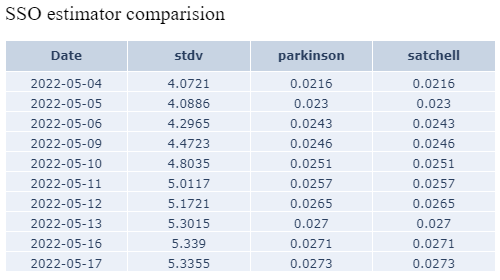

In [69]:
import df2img

#transform pd. dataframe to image

fig = df2img.plot_dataframe(
    sso.round(4),
    print_index=True,
    title=dict(
        font_color="black",
        font_family="Times New Roman",
        font_size=20,
        text="SSO estimator comparision"),
    fig_size=(500, 280),

   )

df2img.save_dataframe(fig=fig, filename='../img/sso_different estimators.png')

fig_stats = fig

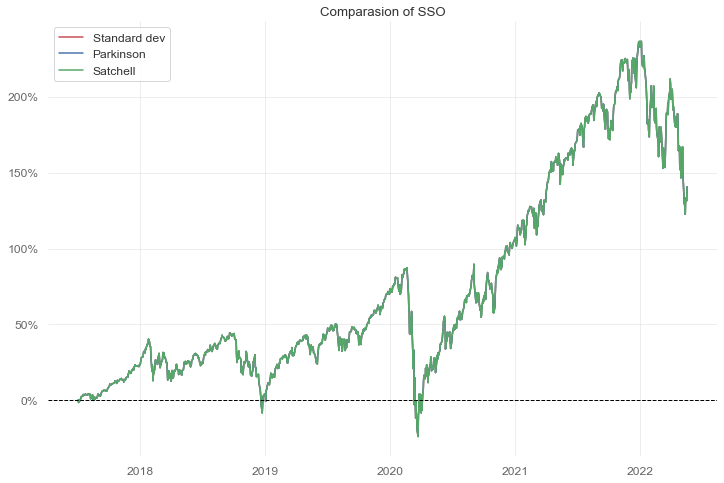

In [5]:
from quantstats.stats import compsum
from quantstats._plotting.core import format_pct_axis

#returns = dict_df['x1 leverage']['Tot']
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title(title)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.plot(compsum(dictionary['stdv']['Tot']), lw=1.5, label='Standard dev', color='r', alpha=1)
ax.plot(compsum(dictionary['park']['Tot']), lw=1.5, label='Parkinson', color='b', alpha=1)
ax.plot(compsum(dictionary['satch']['Tot']), lw=1.5, label='Satchell', color='g', alpha=1)
ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
ax.legend()

plt.savefig('../img/'+ save_name + 'png')

In [16]:
sso_df

,stdv,parkinson,satchell
Date,,,
2007-03-30,0.364294,NaN,NaN
2007-04-02,0.350222,NaN,NaN
2007-04-03,0.334997,NaN,NaN
2007-04-04,0.319004,NaN,NaN
2007-04-05,0.303423,NaN,NaN
...,...,...,...
2022-05-11,5.011734,NaN,0.025712
2022-05-12,5.172109,NaN,0.026455
2022-05-13,5.301462,NaN,0.027030
